In [237]:
import os 
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
target_dir = '../experiment_result/Instacart_full/LGCN_AFD_tri/'

In [248]:
all_files = os.listdir(target_dir)
ds = 'Instacart_full'
model = 'LGCN_AFD_tri'
dates = ['20250113', '20250114', '20250115', '20250116', '20250117', '20250118',]
lrs = [0.00025,]
lamdas = [0.02,]
layers = [1,]
batchs = [100000]
opt = 'RMSProp'
#afd_alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001,]
afd_alphas = [0.0001,]

In [249]:
print(f'ds={ds}, model={model}')
for lr in lrs:
    for lamda in lamdas:
        for layer in layers:
            for batch in batchs:
                for afd_alpha in afd_alphas:
                    print(f'lr={lr}, lamda={lamda}, layer={layer} batch={batch} alpha={afd_alpha}',)
                    sample_files = []
                    for i in range(3):
                        for date in dates:
                            if 'AFD' in model:
                                fn = f'{ds}_{model}_{date}_{lr}_{lamda}_{layer}_{batch}_{opt}_{afd_alpha}_{i}.xlsx'
                            else:
                                fn = f'{ds}_{model}_{date}_{lr}_{lamda}_{layer}_{batch}_{opt}_{i}.xlsx'
                            # print(fn)
                            if fn not in all_files: continue
                            sample_files.append(fn)
                    f1_dfs = [pd.read_excel(target_dir + path, sheet_name='F1') for path in sample_files]
                    ndcg_dfs = [pd.read_excel(target_dir + path, sheet_name='NDCG') for path in sample_files]
                    f1_max_avg = np.mean([df.max().tolist()[1:] for df in f1_dfs], axis=0)
                    ndcg_max_avg = np.mean([df.max().tolist()[1:] for df in ndcg_dfs], axis=0)
                    print(' f1', f1_max_avg, '\n', 'ndcg', ndcg_max_avg)

ds=Instacart_full, model=LGCN_AFD_tri
lr=0.00025, lamda=0.02, layer=1 batch=100000 alpha=0.0001
 f1 [0.03915791 0.05984756 0.0722136  0.0774455  0.07085582 0.058329  ] 
 ndcg [0.1532954  0.12957035 0.11819061 0.11995899 0.14633845 0.17583925]


In [53]:
# opt for LGCN3 on (gpt4 + llama3): f1 [0.09566222 0.1224836  0.13118436 0.13094943 0.11311085 0.0910412 ] ndcg [0.27323609 0.24040905 0.23061904 0.23917694 0.27644874 0.31610538]
# opt for LGCN3 on (llama3_0.0_0.9): f1 [0.0954779  0.12249414 0.1323406  0.1315825  0.11324608 0.09105828] ndcg [0.27540351 0.24168808 0.23171558 0.2407558  0.27999819 0.31902207]
# opt for LGCN3 on (llama_1.0_0.1): f1 [0.09943737 0.12691151 0.13149275 0.12903697 0.11089659 0.09054879] ndcg [0.27303762 0.24196037 0.23205978 0.23944811 0.27869467 0.31765115]
# opt for LGCN3 on (llama_1.0_0.9): f1 [0.09352374 0.12199429 0.13123291 0.13102045 0.11172879 0.09140745] ndcg [0.26820423 0.23839837 0.22969344 0.23887899 0.27432224 0.31367211]

# opt for lightrgcn mba: lr=0.01, lamda=0.01, layer=2 batch=40000; f1 [0.1043882  0.13218166 0.14088198 0.13847097 0.11757213 0.09402242] ndcg [0.27784223 0.24611994 0.24168882 0.25365125 0.29198666 0.32970232]
# opt for light mba: lr=0.005, lamda=0.01, layer=1, batch=10000; f1 [0.10798502 0.13327464 0.14164128 0.1398159  0.11812281 0.09554166] ndcg [0.2801304  0.24972943 0.24431407 0.25744757 0.29420389 0.33371109]
# opt for light3 mba: lr=0.005, lamda=0.01, layer=1, batch=40000; f1 [0.10742416 0.13453152 0.14519534 0.14249464 0.11908526 0.09524877] ndcg [0.28859716 0.256327   0.24887773 0.25887028 0.29659615 0.33448515]
# opt for light_afd mba: lr=0.005, lamda=0.01, layer=2 batch=10000 alpha=0.0001; f1 [0.10654687 0.13475299 0.14356118 0.13929312 0.11855424 0.09451665] ndcg [0.28980274 0.25784264 0.24892491 0.25948245 0.29775753 0.33455745]
# opt for light_afd3 mba: lr=0.005, lamda=0.01, layer=1 batch=10000 alpha=1e-05; f1 [0.10582737 0.13272978 0.14353264 0.14008561 0.11872801 0.09483277] ndcg [0.28626318 0.25492634 0.2468478  0.25526815 0.29456802 0.33369946]

# opt for lgcn mba: lr=0.001, lamda=0.005, layer=1 batch=80000; f1 [0.09546265 0.12075197 0.13517514 0.13407649 0.11588274 0.0934395 ] ndcg [0.26864397 0.23559773 0.2273679  0.23827868 0.2772212  0.31667677]
# opt for lgcn3 mba: lr=0.001, lamda=0.005, layer=1 batch=40000; f1 [0.10682171 0.13463565 0.14359957 0.14104227 0.11874319 0.09493423] ndcg [0.29533704 0.25764606 0.24682478 0.25641847 0.29356802 0.33108195]
# opt for lgcn3 mba (RMSProp): lr=0.001, lamda=0.01, layer=1 batch=80000; f1 [0.10521544 0.13319376 0.14313584 0.14062973 0.1201268  0.09671848] ndcg [0.29332026 0.26014752 0.25026718 0.25775302 0.29399142 0.33250898]
# opt for lgcn_afd mba: lr=0.001, lamda=0.01, layer=1 batch=80000 alpha=0.001; f1 [0.09629221 0.12272833 0.1332329  0.13319008 0.11459296 0.09248102] ndcg [0.27129436 0.23541744 0.22879324 0.2400648  0.27916468 0.31739233]
# opt for lgcn_afd_3 mba: lr=0.001, lamda=0.01, layer=1 batch=80000 alpha=0.001; f1 [0.10539818 0.13631128 0.1464867  0.14392073 0.12135693 0.09716128] ndcg [0.29735928 0.26044439 0.25085218 0.25870754 0.29735932 0.33598086]
# opt for lgcn_afd_3 mba: lr=0.001, lamda=0.02, layer=1 batch=80000 alpha=0.0001; f1 [0.10916731 0.13489473 0.14316549 0.14149467 0.1210056  0.09762251] ndcg [0.29397608 0.25484908 0.24967355 0.26168681 0.29959627 0.33919336]


In [7]:
np.array([0.10742416, 0.13453152, 0.14519534, 0.14249464, 0.11908526, 0.09524877]) / np.array([0.10798502, 0.13327464, 0.14164128, 0.1398159,  0.11812281, 0.09554166]) - 1

array([-0.00519387,  0.00943075,  0.02509198,  0.01915905,  0.00814788,
       -0.00306557])

In [12]:
# opt for light3 instacart: lr=0.005, lamda=0.01, layer=2 batch=40000; f1 [0.04121316 0.06082257 0.07177164 0.07498703 0.06805384 0.05616522] ndcg [0.14920505 0.12826461 0.11794306 0.11965378 0.1448109  0.173249]
# opt for light instacart: lr=0.005, lamda=0.01, layer=2 batch=40000; f1 [0.04146755 0.0609242  0.07155098 0.07517902 0.06844615 0.0562432] ndcg [0.14766028 0.12734479 0.11803159 0.11976799 0.14484021 0.1733088 ]
# opt for lgcn instacart: lr=0.0005, lamda=0.005, layer=1 batch=80000; f1 [0.03747558 0.0563706  0.06718952 0.07097643 0.06439309 0.05277251] ndcg [0.14051353 0.12076647 0.11055972 0.11167903 0.1350913  0.16179414]
# opt for lgcn3 instacart: lr=0.0005, lamda=0.005, layer=1 batch=80000; f1 [0.0405299  0.06018499 0.07113397 0.0758716  0.06862302 0.0559944 ] ndcg [0.1551352  0.12925793 0.1179556  0.11963635 0.14369178 0.17120245]
# LGCN3 on rw=2: f1 [0.09571832 0.12243192 0.13389408 0.13109718 0.11289885 0.09062639] ndcg [0.2747528  0.23931651 0.22856417 0.23875896 0.27732563 0.31463977]

# opt for light_afd instacart: lr=0.005, lamda=0.005, layer=2 batch=40000 alpha=0.0001 f1 [0.0426489  0.06288577 0.07303695 0.07682698 0.06922466 0.05675624] ndcg [0.15351311 0.13080552 0.12045968 0.12217071 0.1476335  0.17607449]
# opt for lgcn_afd_tri instacart: lr=0.001, lamda=0.01, layer=1 batch=80000 alpha=0.0001 f1 [0.04214462 0.06144547 0.07260855 0.07665313 0.06918275 0.05641819] ndcg [0.15945541 0.13315884 0.12070392 0.12175348 0.14655056 0.17461642]
# opt for lgcn_afd_tri instacart: lr=0.001, lamda=0.01, layer=1 batch=120000 alpha=0.0001 f1 [0.0427038  0.06236809 0.07312852 0.07734907 0.06958143 0.05668489] ndcg [0.16088474 0.13372393 0.12176058 0.122835   0.14775621 0.1755237 ]
# opt for light_afd_tri instacart: lr=0.005, lamda=0.005, layer=2 batch=40000 alpha=0.0001 f1 [0.04249109 0.0629989  0.07282343 0.07670632 0.06958537 0.05719949] ndcg [0.155113   0.13380115 0.12213461 0.12317799 0.14838664 0.17669553]

# opr for lgcn_afd_tri instacart: lr=0.001, lamda=0.01, layer=1 batch=160000 alpha=0.001 f1 [0.04331288 0.06275558 0.07381832 0.07798079 0.07013748 0.05704173] ndcg [0.16337726 0.13566736 0.12301593 0.12416468 0.14913781 0.17655825]

In [ ]:
# opt for lgcn_afd instacart full: lr=0.0005, lamda=0.02, layer=1 batch=300000 alpha=0.0001 f1 [0.03799738 0.05721529 0.06831755 0.07283803 0.06633009 0.05444827] ndcg [0.14897051 0.12558602 0.11329051 0.11391938 0.13756192 0.1641566 ]
# opt for lgcn_afd_tri instacart full: lr=0.00025, lamda=0.02, layer=1 batch=100000 alpha=0.0001 f1 [0.03915791 0.05984756 0.0722136  0.0774455  0.07085582 0.058329] ndcg [0.1532954  0.12957035 0.11819061 0.11995899 0.14633845 0.17583925]

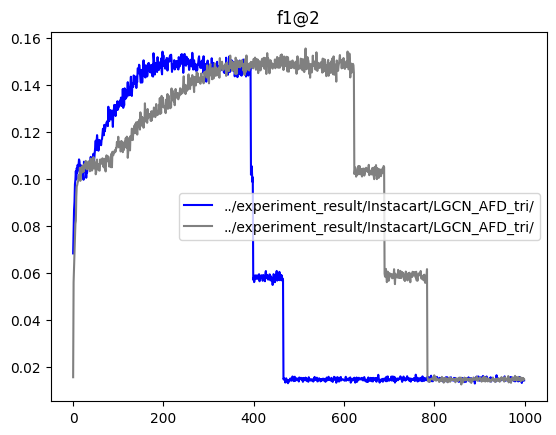

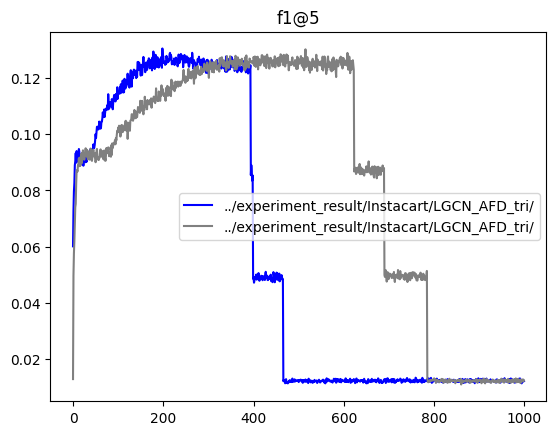

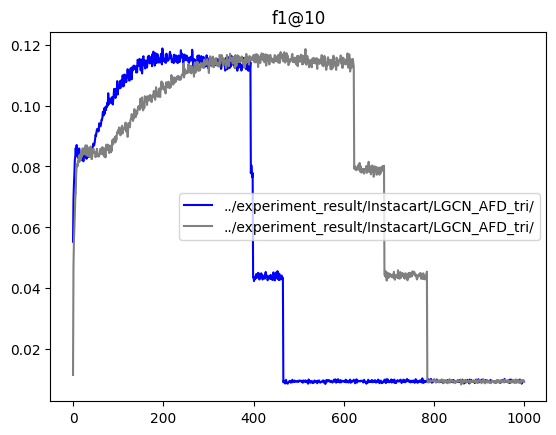

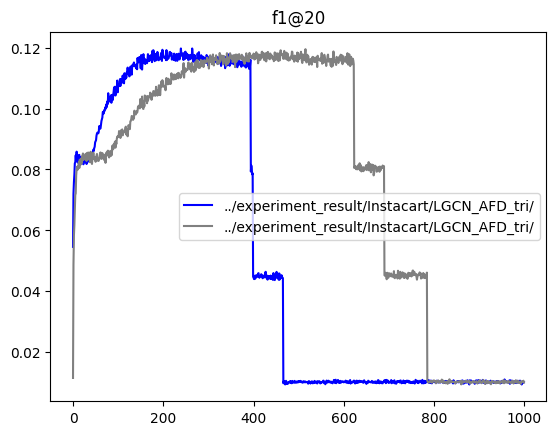

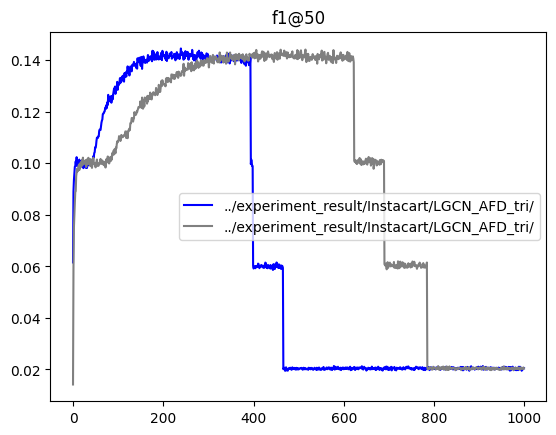

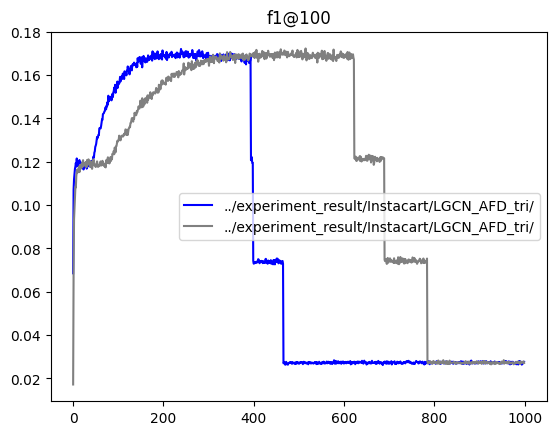

In [207]:
sample_files = ['Instacart_LGCN_AFD_tri_20250114_0.001_0.01_1_80000_RMSProp_0.0001_0.xlsx',
                'Instacart_LGCN_AFD_tri_20250114_0.001_0.01_1_80000_RMSProp_0.0001_1.xlsx',
                'Instacart_LGCN_AFD_tri_20250115_0.001_0.01_1_80000_RMSProp_0.0001_2.xlsx',]

f1_dfs = [pd.read_excel(target_dir + path, sheet_name='F1') for path in sample_files]
ndcg_dfs = [pd.read_excel(target_dir + path, sheet_name='NDCG') for path in sample_files]

# compare model
target_dir2 = '../experiment_result/Instacart/LGCN_AFD_tri/'
sample_files2 = ['Instacart_LGCN_AFD_tri_20250114_0.0005_0.01_1_80000_RMSProp_0.0001_0.xlsx',
                 'Instacart_LGCN_AFD_tri_20250114_0.0005_0.01_1_80000_RMSProp_0.0001_1.xlsx',
                 'Instacart_LGCN_AFD_tri_20250115_0.0005_0.01_1_80000_RMSProp_0.0001_2.xlsx',]
f1_dfs2 = [pd.read_excel(target_dir2 + path, sheet_name='F1') for path in sample_files2]
ndcg_dfs2 = [pd.read_excel(target_dir2 + path, sheet_name='NDCG') for path in sample_files2]

for k in [2, 5, 10, 20, 50 ,100]:
    f1_lines = [df[k].tolist() for df in ndcg_dfs]
    f1_mean = np.mean(f1_lines, axis=0)
    plt.plot(f1_mean, label=target_dir, color='blue')

    f1_lines2 = [df[k].tolist() for df in ndcg_dfs2]
    f1_mean2 = np.mean(f1_lines2, axis=0)
    plt.plot(f1_mean2, label=target_dir2, color='grey')
    
    plt.title(f'f1@{k}')

    plt.legend()
    plt.show()

In [177]:
all_files

['drive-download-20250114T115827Z-001.zip',
 '.DS_Store',
 'Instacart_LGCN_20250113_0.001_0.005_1_80000_RMSProp_1.xlsx',
 'MBA_LGCN_20240510_1.xlsx',
 'Instacart_LGCN_20250113_0.0005_0.005_1_80000_RMSProp_2.xlsx',
 'Instacart_LGCN_20250113_0.001_0.005_1_80000_RMSProp_0.xlsx',
 'Instacart_LGCN_20250113_0.0005_0.005_1_80000_RMSProp_1.xlsx',
 'drive-download-20250114T115827Z-001',
 'Instacart_LGCN_20250113_0.0005_0.005_1_80000_RMSProp_0.xlsx',
 'Instacart_LGCN_20250113_0.001_0.005_1_80000_RMSProp_2.xlsx',
 'MBA_LGCN_20240511_1.xlsx']

In [194]:
all_files

['.DS_Store',
 'Instacart_LGCN_AFD_tri_20250115_0.0005_0.01_1_80000_RMSProp_0.0001_2.xlsx',
 'Instacart_LGCN_AFD_tri_20250114_0.0005_0.01_1_80000_RMSProp_0.0001_0.xlsx',
 'Instacart_LGCN_AFD_tri_20250115_0.001_0.01_1_80000_RMSProp_0.0001_2.xlsx',
 'Instacart_LGCN_AFD_tri_20250114_0.0005_0.01_1_80000_RMSProp_0.0001_1.xlsx',
 'Instacart_LGCN_AFD_tri_20250114_0.001_0.01_1_80000_RMSProp_0.0001_0.xlsx',
 'Instacart_LGCN_AFD_tri_20250114_0.001_0.01_1_80000_RMSProp_0.0001_1.xlsx']

In [229]:
a3 = np.array([0.15514,0.12926,0.11796,0.11964,0.14369,0.17120])
aback = np.array([0.14051,0.12077,0.11056,0.11168,0.13509,0.16179])
a3/aback

array([1.1041207 , 1.07029892, 1.06693198, 1.07127507, 1.06366126,
       1.05816181])

In [228]:
print(
"""
0.14051
0.12077
0.11056
0.11168
0.13509
0.16179



""".replace('()','').replace('\n',',')
)

,0.14051,0.12077,0.11056,0.11168,0.13509,0.16179,,,,
